In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option("display.max_rows", 100, "display.max_columns", 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def p(s):
    print(s)
    
pd.DataFrame.len = pd.Index.len = lambda x: print(len(x))

In [3]:
# Partition training, dev, and test data
seasonHist = pd.read_csv('seasonHist.csv')
X = seasonHist \
    .loc[:,seasonHist.columns.str.contains('-\d+') | seasonHist.columns.str.match('fanPts')] \
    .drop('fanPts',axis=1) \
    .fillna(0)
y = seasonHist.fanPts

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

# Manually downselect useful columns
keepCols = \
    X.columns.str.contains('fanPts') | \
    X.columns.str.contains('^complete_pass') | \
    X.columns.str.contains('rush_attempt') | \
    X.columns.str.contains('yards_gained') | \
    X.columns.str.contains('^touchdown')

X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(X.loc[:,keepCols], y, test_size=0.3, random_state=0)
X_dev_select, X_test_select, y_dev_select, y_test_select = train_test_split(X_test_select, y_test_select, test_size=0.5, random_state=0)

In [22]:
# Manually downselect useful columns
keepCols = \
    X.columns.str.contains('fanPts') | \
    X.columns.str.contains('^complete_pass') | \
    X.columns.str.contains('rush_attempt') | \
    X.columns.str.contains('yards_gained') | \
    X.columns.str.contains('^touchdown')

X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(X.loc[:,keepCols], y, test_size=0.3, random_state=0)
X_dev_select, X_test_select, y_dev_select, y_test_select = train_test_split(X_test_select, y_test_select, test_size=0.5, random_state=0)

### Linear Regression

#### Base model

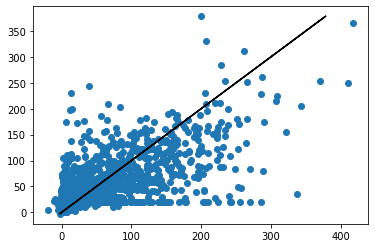

MSE: 2249.5
R^2: 0.45


,touchdown-1,fumble-1,fanPts-1,yards_gained-1,rec_yards-1,rush_yards-1,rush_yards-3,rec_yards-3,yards_gained-3,pass_touchdown-3,yards_gained-2,rush_yards-2,rec_yards-2,rush_touchdown-3,rush_touchdown-2,pass_touchdown-2,interception-2,complete_pass-2,pass_attempt-2,incomplete_pass-2,incomplete_pass-1,fumble-2,complete_pass-1,complete_pass-3,pass_attempt-3,fumble-3,incomplete_pass-3,pass_attempt-1,interception-1,interception-3,rush_touchdown-1,fanPts-3,touchdown-2,pass_touchdown-1,touchdown-3,qb_hit-2,fanPts-2,qb_dropback-1,qb_hit-1,tackled_for_loss-1,rush_attempt-1,qb_hit-3,qb_dropback-3,tackled_for_loss-3,rush_attempt-3,no_huddle-1,qb_dropback-2,shotgun-1,no_huddle-3,shotgun-3,tackled_for_loss-2,no_huddle-2,yards_after_catch-1,rush_attempt-2,shotgun-2,yards_after_catch-2,air_yards-2,yards_after_catch-3,air_yards-3,air_yards-1
1,-67344989550.079,22448329848.953,11224164925.037,-1122416480.460,-11.962,-11.901,9.725,9.705,-9.575,7.765,6.991,-6.919,-6.892,6.532,5.209,4.729,4.477,3.764,-3.742,3.312,2.632,-2.427,2.301,-2.256,2.210,-1.972,-1.968,-1.963,1.783,-1.304,1.134,-1.073,-1.024,0.992,-0.677,-0.610,-0.593,-0.481,-0.474,0.469,-0.323,0.262,-0.256,0.184,-0.153,-0.106,-0.081,0.057,0.057,-0.052,-0.023,-0.018,-0.015,0.014,0.013,0.010,0.008,0.008,-0.007,0.003


In [10]:
m = linear_model.LinearRegression()
m.fit(X_train,y_train)
y_pred = regr.predict(X_dev)

plt.scatter(y_dev, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train.columns,regr.coef_]).transpose()
coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()

### Ridge Regression

#### Base model

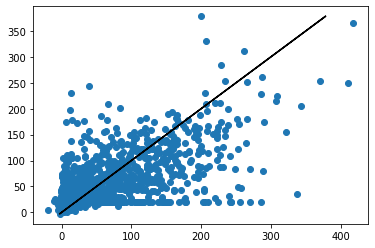

MSE: 2244.2
R^2: 0.45


,rush_yards-3,rec_yards-3,yards_gained-3,pass_touchdown-3,yards_gained-1,rec_yards-1,rush_yards-1,rush_touchdown-3,yards_gained-2,rush_yards-2,rec_yards-2,rush_touchdown-2,pass_touchdown-2,interception-2,complete_pass-2,pass_attempt-2,incomplete_pass-2,incomplete_pass-1,fumble-2,complete_pass-1,complete_pass-3,pass_attempt-3,fumble-3,pass_attempt-1,incomplete_pass-3,interception-1,interception-3,rush_touchdown-1,fanPts-3,touchdown-2,pass_touchdown-1,fumble-1,touchdown-3,qb_hit-2,fanPts-2,qb_dropback-1,qb_hit-1,tackled_for_loss-1,touchdown-1,rush_attempt-1,qb_hit-3,qb_dropback-3,tackled_for_loss-3,rush_attempt-3,no_huddle-1,fanPts-1,qb_dropback-2,shotgun-1,no_huddle-3,shotgun-3,tackled_for_loss-2,no_huddle-2,yards_after_catch-1,rush_attempt-2,shotgun-2,yards_after_catch-2,yards_after_catch-3,air_yards-2,air_yards-3,air_yards-1
1,8.666,8.646,-8.517,7.738,6.903,-6.831,-6.770,6.506,6.330,-6.258,-6.231,5.192,4.712,4.443,3.733,-3.710,3.281,2.613,-2.426,2.282,-2.230,2.183,-1.958,-1.945,-1.941,1.762,-1.280,1.128,-1.067,-1.013,0.991,-0.938,-0.689,-0.611,-0.592,-0.480,-0.472,0.470,-0.412,-0.322,0.263,-0.255,0.184,-0.153,-0.106,0.093,-0.081,0.057,0.057,-0.052,-0.022,-0.018,-0.015,0.014,0.012,0.009,0.008,0.008,-0.007,0.003


In [960]:
m = linear_model.Ridge()
m.fit(X_train,y_train)
y_pred = m.predict(X_dev)

plt.scatter(y_dev, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train.columns,m.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

#### GridSearchCV

Best parameters set found on development set:
{'alpha': 100000, 'normalize': False}


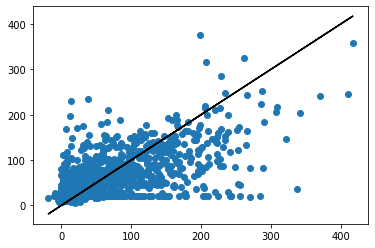

MSE: 2236.3
R^2: 0.45


,qb_dropback-1,qb_dropback-2,rush_attempt-1,qb_dropback-3,fanPts-1,incomplete_pass-1,pass_attempt-1,tackled_for_loss-1,rush_attempt-3,fumble-1,fumble-2,incomplete_pass-2,qb_hit-2,incomplete_pass-3,complete_pass-2,qb_hit-1,no_huddle-1,tackled_for_loss-2,complete_pass-3,tackled_for_loss-3,yards_gained-1,shotgun-3,fanPts-2,rush_yards-1,fumble-3,pass_touchdown-3,pass_attempt-3,interception-1,no_huddle-3,rush_attempt-2,touchdown-2,shotgun-1,rush_touchdown-3,rec_yards-2,yards_gained-3,touchdown-3,yards_gained-2,interception-2,pass_attempt-2,rush_yards-3,yards_after_catch-1,fanPts-3,complete_pass-1,shotgun-2,rush_touchdown-2,yards_after_catch-2,yards_after_catch-3,no_huddle-2,touchdown-1,rec_yards-3,air_yards-3,rec_yards-1,rush_touchdown-1,pass_touchdown-2,rush_yards-2,air_yards-2,pass_touchdown-1,air_yards-1,interception-3,qb_hit-3
1,-0.288,-0.270,-0.233,-0.196,0.194,0.187,0.152,0.135,-0.130,-0.114,-0.109,-0.098,-0.092,0.085,0.081,-0.079,-0.068,0.063,-0.060,0.058,0.058,-0.057,0.056,0.052,-0.049,0.042,0.037,-0.032,0.030,-0.029,-0.027,0.026,-0.025,0.021,0.020,-0.019,0.019,0.018,-0.017,0.016,-0.015,-0.015,0.014,0.011,0.010,0.008,0.008,-0.007,-0.006,0.006,-0.006,0.005,0.005,-0.005,-0.005,0.004,0.004,0.003,0.003,0.002


In [11]:
grid = GridSearchCV(
    linear_model.Ridge(),
    {'alpha':[10**x for x in range(-4,6)],'normalize':[True,False]},
    n_jobs = -1,
    cv = 5
)

grid.fit(X_train,y_train)

print("Best parameters set found on development set:")
print(grid.best_params_)
     
# pd.DataFrame(grid.cv_results_)[['param_alpha','param_normalize','mean_test_score','std_test_score','rank_test_score']]

m = linear_model.Ridge(**grid.best_params_)
m.fit(X_train,y_train)
y_pred = m.predict(X_dev)

plt.scatter(y_dev, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train.columns,m.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

### Lasso Regression

#### Base model

C:\Users\mrkawa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11054.129647193477, tolerance: 3037.9150681688084
  positive)


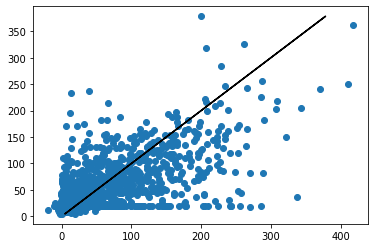

MSE: 2236.6
R^2: 0.45


,qb_dropback-1,incomplete_pass-1,fumble-2,tackled_for_loss-1,rush_attempt-1,pass_attempt-1,qb_dropback-2,qb_dropback-3,fanPts-1,incomplete_pass-2,qb_hit-2,rush_attempt-3,incomplete_pass-3,qb_hit-1,complete_pass-2,yards_gained-1,no_huddle-1,fumble-1,shotgun-3,rush_yards-1,fanPts-2,shotgun-1,yards_gained-2,yards_gained-3,rec_yards-2,rec_yards-1,yards_after_catch-1,rush_yards-2,complete_pass-1,rush_yards-3,rush_attempt-2,shotgun-2,yards_after_catch-2,air_yards-3,air_yards-2,yards_after_catch-3,air_yards-1,touchdown-3,rush_touchdown-1,tackled_for_loss-3,touchdown-1,pass_touchdown-1,interception-1,qb_hit-3,rush_touchdown-3,pass_touchdown-3,no_huddle-2,pass_attempt-2,pass_touchdown-2,rec_yards-3,rush_touchdown-2,tackled_for_loss-2,touchdown-2,fanPts-3,complete_pass-3,fumble-3,interception-3,no_huddle-3,pass_attempt-3,interception-2
1,-0.461,0.328,-0.314,0.300,-0.289,0.260,-0.257,-0.209,0.208,-0.166,-0.144,-0.128,0.120,-0.097,0.079,0.078,-0.070,-0.044,-0.040,0.039,0.036,0.034,0.027,0.024,0.015,-0.015,-0.013,-0.012,0.012,0.010,-0.009,0.007,0.006,-0.005,0.005,0.005,0.002,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000


In [5]:
m = linear_model.Lasso()
m.fit(X_train,y_train)
y_pred = regr.predict(X_dev)

plt.scatter(y_dev, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train.columns,regr.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

#### GridSearchCV

Best parameters set found on development set:
{'alpha': 0.01, 'normalize': True}


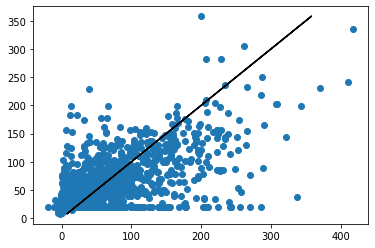

MSE: 2243.6
R^2: 0.45


,fumble-2,fumble-1,fanPts-1,fumble-3,fanPts-2,yards_gained-1,yards_gained-2,rec_yards-2,air_yards-1,no_huddle-2,interception-2,incomplete_pass-2,complete_pass-2,rush_yards-1,rec_yards-1,yards_after_catch-1,touchdown-1,pass_touchdown-2,tackled_for_loss-1,shotgun-1,rush_touchdown-1,rush_attempt-1,qb_hit-1,qb_dropback-1,pass_touchdown-1,pass_attempt-1,no_huddle-1,interception-1,incomplete_pass-1,complete_pass-1,pass_attempt-2,rush_yards-3,qb_dropback-2,rec_yards-3,yards_gained-3,yards_after_catch-3,air_yards-3,touchdown-3,tackled_for_loss-3,shotgun-3,rush_touchdown-3,rush_attempt-3,qb_hit-3,qb_dropback-3,pass_touchdown-3,pass_attempt-3,no_huddle-3,interception-3,incomplete_pass-3,complete_pass-3,fanPts-3,rush_yards-2,yards_after_catch-2,air_yards-2,touchdown-2,tackled_for_loss-2,shotgun-2,rush_touchdown-2,rush_attempt-2,qb_hit-2
1,-0.992,-0.738,0.222,-0.099,0.056,0.052,0.008,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000


In [6]:
grid = GridSearchCV(
    linear_model.Lasso(),
    {'alpha':[10**x for x in range(-4,6)],'normalize':[True,False]},
    n_jobs = -1,
    cv = 5
)

grid.fit(X_train,y_train)

print("Best parameters set found on development set:")
print(grid.best_params_)
     
# pd.DataFrame(grid.cv_results_)[['param_alpha','param_normalize','mean_test_score','std_test_score','rank_test_score']]

m = linear_model.Lasso(**grid.best_params_)
m.fit(X_train,y_train)
y_pred = m.predict(X_dev)

plt.scatter(y_dev, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train.columns,m.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

#### GridSearchCV, hand-selected features

C:\Users\mrkawa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2912380.88478233, tolerance: 3037.9150681688084
  positive)
C:\Users\mrkawa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2912380.88478233, tolerance: 3037.9150681688084
  positive)


Best parameters set found on development set:
{'alpha': 0.0001, 'normalize': True}


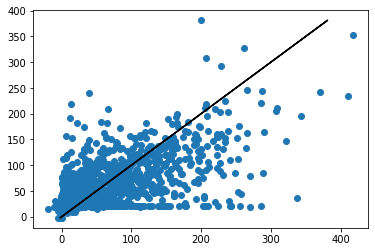

MSE: 2249.8
R^2: 0.45


,touchdown-1,touchdown-2,touchdown-3,fanPts-1,fanPts-2,incomplete_pass-2,fanPts-3,complete_pass-1,complete_pass-3,incomplete_pass-1,rush_attempt-3,incomplete_pass-3,rush_attempt-2,rush_attempt-1,yards_gained-2,complete_pass-2,yards_gained-3,yards_gained-1
1,-4.730,-4.138,-2.238,0.971,0.709,-0.445,0.324,-0.307,-0.295,0.141,-0.084,-0.081,-0.080,-0.055,-0.035,0.034,-0.005,-0.002


In [7]:
grid = GridSearchCV(
    linear_model.Lasso(),
    {'alpha':[10**x for x in range(-4,6)],'normalize':[True,False]},
    n_jobs = -1,
    cv = 5
)

grid.fit(X_train_select,y_train_select)

print("Best parameters set found on development set:")
print(grid.best_params_)
     
# pd.DataFrame(grid.cv_results_)[['param_alpha','param_normalize','mean_test_score','std_test_score','rank_test_score']]

m = linear_model.Lasso(**grid.best_params_)
m.fit(X_train_select,y_train_select)
y_pred = m.predict(X_dev_select)

plt.scatter(y_dev_select, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train_select.columns,m.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

#### GridSearchCV, hand-selected features

C:\Users\mrkawa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2912380.88478233, tolerance: 3037.9150681688084
  positive)
C:\Users\mrkawa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2912380.88478233, tolerance: 3037.9150681688084
  positive)


Best parameters set found on development set:
{'alpha': 0.0001, 'normalize': True}


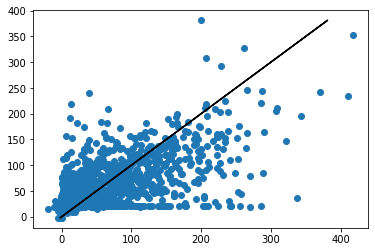

MSE: 2249.8
R^2: 0.45


,touchdown-1,touchdown-2,touchdown-3,fanPts-1,fanPts-2,incomplete_pass-2,fanPts-3,complete_pass-1,complete_pass-3,incomplete_pass-1,rush_attempt-3,incomplete_pass-3,rush_attempt-2,rush_attempt-1,yards_gained-2,complete_pass-2,yards_gained-3,yards_gained-1
1,-4.730,-4.138,-2.238,0.971,0.709,-0.445,0.324,-0.307,-0.295,0.141,-0.084,-0.081,-0.080,-0.055,-0.035,0.034,-0.005,-0.002


In [7]:
grid = GridSearchCV(
    linear_model.Lasso(),
    {'alpha':[10**x for x in range(-4,6)],'normalize':[True,False]},
    n_jobs = -1,
    cv = 5
)

grid.fit(X_train_select,y_train_select)

print("Best parameters set found on development set:")
print(grid.best_params_)
     
# pd.DataFrame(grid.cv_results_)[['param_alpha','param_normalize','mean_test_score','std_test_score','rank_test_score']]

m = linear_model.Lasso(**grid.best_params_)
m.fit(X_train_select,y_train_select)
y_pred = m.predict(X_dev_select)

plt.scatter(y_dev_select, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train_select.columns,m.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

### Elastic Net Regression

#### Base model

C:\Users\mrkawa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45575.09840982035, tolerance: 3037.9150681688084
  positive)


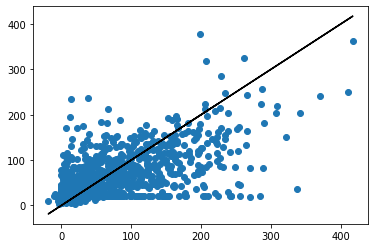

MSE: 2234.7
R^2: 0.45


,fumble-2,qb_dropback-1,incomplete_pass-1,tackled_for_loss-1,fumble-1,qb_hit-2,rush_attempt-1,qb_hit-1,qb_dropback-2,incomplete_pass-2,qb_dropback-3,fanPts-1,incomplete_pass-3,pass_attempt-1,rush_attempt-3,complete_pass-1,complete_pass-2,no_huddle-1,yards_gained-1,pass_touchdown-3,shotgun-3,shotgun-1,complete_pass-3,fanPts-2,rush_yards-1,yards_gained-3,yards_gained-2,rec_yards-1,fanPts-3,rush_yards-2,yards_after_catch-1,shotgun-2,rec_yards-2,no_huddle-3,tackled_for_loss-3,rush_yards-3,yards_after_catch-3,rush_attempt-2,yards_after_catch-2,air_yards-2,air_yards-3,air_yards-1,rec_yards-3,tackled_for_loss-2,pass_touchdown-1,pass_touchdown-2,pass_attempt-2,no_huddle-2,interception-1,interception-3,fumble-3,interception-2,rush_touchdown-2,touchdown-3,pass_attempt-3,rush_touchdown-1,rush_touchdown-3,touchdown-2,qb_hit-3,touchdown-1
1,-0.509,-0.460,0.436,0.357,-0.321,-0.298,-0.298,-0.242,-0.232,-0.224,-0.216,0.207,0.172,0.165,-0.133,0.121,0.095,-0.089,0.080,0.068,-0.047,0.041,-0.040,0.039,0.038,0.028,0.028,-0.019,-0.017,-0.014,-0.013,0.012,0.012,0.011,0.011,0.010,0.007,-0.007,0.006,0.006,-0.006,0.003,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000


In [12]:
m = linear_model.ElasticNet()
m.fit(X_train,y_train)
y_pred = regr.predict(X_dev)

plt.scatter(y_dev, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train.columns,regr.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

#### GridSearchCV

Best parameters set found on development set:
{'alpha': 10, 'normalize': False}


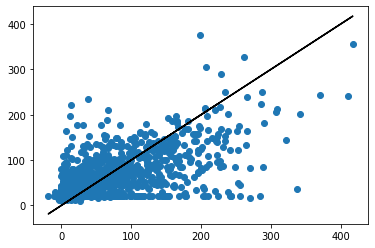

MSE: 2239.4
R^2: 0.45


,qb_dropback-2,fanPts-1,rush_attempt-1,qb_dropback-3,qb_dropback-1,rush_attempt-3,yards_gained-1,rush_yards-1,rec_yards-2,incomplete_pass-1,shotgun-3,yards_gained-3,yards_gained-2,yards_after_catch-1,yards_after_catch-2,pass_attempt-1,fanPts-2,air_yards-3,rush_yards-2,air_yards-1,air_yards-2,yards_after_catch-3,rec_yards-1,touchdown-1,complete_pass-2,rush_touchdown-1,tackled_for_loss-1,shotgun-1,incomplete_pass-2,qb_hit-1,pass_touchdown-1,no_huddle-1,interception-1,fumble-1,complete_pass-1,fumble-2,rush_yards-3,interception-2,fumble-3,touchdown-3,tackled_for_loss-3,rush_touchdown-3,qb_hit-3,pass_touchdown-3,pass_attempt-3,no_huddle-3,interception-3,incomplete_pass-3,complete_pass-3,no_huddle-2,fanPts-3,touchdown-2,tackled_for_loss-2,shotgun-2,rush_touchdown-2,rush_attempt-2,rec_yards-3,pass_touchdown-2,pass_attempt-2,qb_hit-2
1,-0.289,0.175,-0.172,-0.144,-0.090,-0.074,0.067,0.033,0.031,0.030,-0.025,0.021,0.019,-0.013,0.009,0.007,0.005,-0.004,-0.003,0.003,0.002,0.002,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000


In [47]:
grid = GridSearchCV(
    linear_model.ElasticNet(),
    {'alpha':[10**x for x in range(-4,6)],'normalize':[True,False]},
    n_jobs = -1,
    cv = 5
)

grid.fit(X_train,y_train)

print("Best parameters set found on development set:")
print(grid.best_params_)
     
# pd.DataFrame(grid.cv_results_)[['param_alpha','param_normalize','mean_test_score','std_test_score','rank_test_score']]

m = linear_model.ElasticNet(**grid.best_params_)
m.fit(X_train,y_train)
y_pred = m.predict(X_dev)

plt.scatter(y_dev, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train.columns,m.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

#### Automatic CV

Alpha: 24.774416665163272
l1 ratio: 0.75


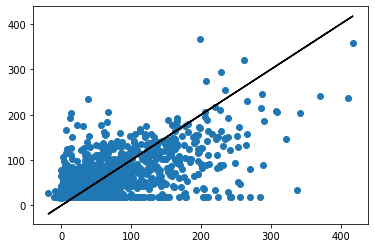

MSE: 2249.0
R^2: 0.45


,qb_dropback-2,fanPts-1,yards_gained-1,rec_yards-2,yards_gained-2,rush_attempt-1,yards_after_catch-1,air_yards-3,rush_yards-1,yards_after_catch-2,air_yards-1,air_yards-2,qb_dropback-3,yards_gained-3,complete_pass-2,fanPts-2,rec_yards-1,fumble-2,incomplete_pass-2,tackled_for_loss-1,touchdown-1,no_huddle-2,shotgun-1,rush_touchdown-1,qb_hit-1,qb_dropback-1,pass_touchdown-1,pass_attempt-1,no_huddle-1,interception-1,incomplete_pass-1,fumble-1,complete_pass-1,interception-2,rush_yards-3,pass_attempt-2,interception-3,yards_after_catch-3,touchdown-3,tackled_for_loss-3,shotgun-3,rush_touchdown-3,rush_attempt-3,qb_hit-3,pass_touchdown-3,pass_attempt-3,no_huddle-3,incomplete_pass-3,pass_touchdown-2,fumble-3,complete_pass-3,fanPts-3,rush_yards-2,touchdown-2,tackled_for_loss-2,shotgun-2,rush_touchdown-2,rush_attempt-2,rec_yards-3,qb_hit-2
1,-0.163,0.080,0.072,0.023,0.014,-0.010,-0.008,-0.003,0.003,0.003,0.003,0.002,-0.002,0.001,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000


In [57]:
m = linear_model.ElasticNetCV(l1_ratio=[.25,.5,.75], random_state=0)
m.fit(X_train,y_train)
print(f'Alpha: {m.alpha_}')
print(f'l1 ratio: {m.l1_ratio_}')

y_pred = m.predict(X_dev)

plt.scatter(y_dev, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train.columns,m.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

#### GridSearchCV, hand-selected features

C:\Users\mrkawa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8029047.26623398, tolerance: 3037.9150681688084
  positive)
C:\Users\mrkawa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8029047.26623398, tolerance: 3037.9150681688084
  positive)


Best parameters set found on development set:
{'alpha': 0.0001, 'l1_ratio': 0.25, 'normalize': False}


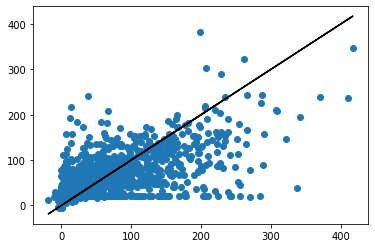

MSE: 2249.8
R^2: 0.45


,touchdown-1,touchdown-2,touchdown-3,fanPts-1,fanPts-2,fanPts-3,complete_pass-3,complete_pass-1,complete_pass-2,yards_gained-2,rush_attempt-3,rush_attempt-1,rush_attempt-2,yards_gained-3,yards_gained-1
1,-5.314,-5.215,-3.249,1.072,0.901,0.484,-0.306,-0.244,-0.082,-0.064,-0.063,-0.056,-0.033,-0.024,-0.012


In [51]:
grid = GridSearchCV(
    linear_model.ElasticNet(),
    {
        'alpha':[10**x for x in range(-4,6)],
        'normalize':[True,False],
        'l1_ratio':[.25,.5,.75]
    },
    n_jobs = -1,
    cv = 5
)

grid.fit(X_train_select,y_train_select)

print("Best parameters set found on development set:")
print(grid.best_params_)
     
# pd.DataFrame(grid.cv_results_)[['param_alpha','param_normalize','mean_test_score','std_test_score','rank_test_score']]

m = linear_model.ElasticNet(**grid.best_params_)
m.fit(X_train_select,y_train_select)
y_pred = m.predict(X_dev_select)

plt.scatter(y_dev_select, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train_select.columns,m.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

#### Automatic CV, hand-selected features

Alpha: 24.774416665163272
l1 ratio: 0.75


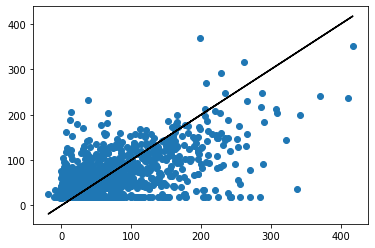

MSE: 2253.4
R^2: 0.45


,fanPts-1,yards_gained-1,yards_gained-2,rush_attempt-2,rush_attempt-1,yards_gained-3,touchdown-3,rush_attempt-3,complete_pass-3,fanPts-3,touchdown-2,complete_pass-2,fanPts-2,touchdown-1,complete_pass-1
1,0.091,0.071,0.018,-0.013,-0.009,-0.001,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000


In [58]:
m = linear_model.ElasticNetCV(l1_ratio=[.25,.5,.75], random_state=0)
m.fit(X_train_select,y_train_select)
print(f'Alpha: {m.alpha_}')
print(f'l1 ratio: {m.l1_ratio_}')

y_pred = m.predict(X_dev_select)

plt.scatter(y_dev_select, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train_select.columns,m.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

#### GridSearchCV, hand-selected features, force positive coefficients

Best parameters set found on development set:
{'alpha': 10, 'l1_ratio': 0.75, 'normalize': False, 'positive': True}


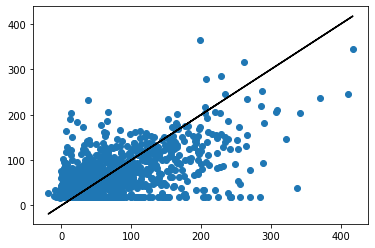

MSE: 2255.8
R^2: 0.44


,fanPts-1,yards_gained-1,fanPts-2,yards_gained-2,yards_gained-3,touchdown-3,rush_attempt-3,complete_pass-3,fanPts-3,touchdown-2,rush_attempt-2,complete_pass-2,touchdown-1,rush_attempt-1,complete_pass-1
1,0.193,0.057,0.025,0.013,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [35]:
grid = GridSearchCV(
    linear_model.ElasticNet(),
    {
        'alpha':[10**x for x in range(-4,6)],
        'normalize':[True,False],
        'l1_ratio':[.25,.5,.75],
        'positive':[True]
    },
    n_jobs = -1,
    cv = 5
)

grid.fit(X_train_select,y_train_select)

print("Best parameters set found on development set:")
print(grid.best_params_)
     
# pd.DataFrame(grid.cv_results_)[['param_alpha','param_normalize','mean_test_score','std_test_score','rank_test_score']]

m = linear_model.ElasticNet(**grid.best_params_)
m.fit(X_train_select,y_train_select)
y_pred = m.predict(X_dev_select)

plt.scatter(y_dev_select, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train_select.columns,m.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

#### Automatic CV, hand-selected features, force positive coefficients

Alpha: 24.774416665163272
l1 ratio: 0.75


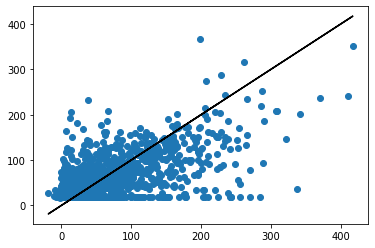

MSE: 2258.0
R^2: 0.44


array([0.10030225, 0.        , 0.        , 0.        , 0.06914048,
       0.        , 0.        , 0.        , 0.        , 0.0160317 ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [60]:
m = linear_model.ElasticNetCV(l1_ratio=[.25,.5,.75], positive=[True], random_state=0)
m.fit(X_train_select,y_train_select)
print(f'Alpha: {m.alpha_}')
print(f'l1 ratio: {m.l1_ratio_}')

y_pred = m.predict(X_dev_select)

plt.scatter(y_dev_select, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train_select.columns,m.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

### Bayesian Ridge Regression

#### Base model

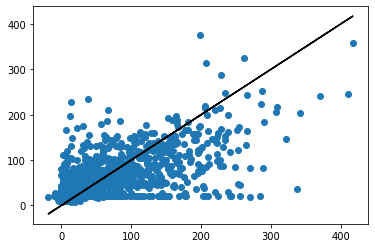

MSE: 2236.2
R^2: 0.45


,qb_dropback-2,qb_dropback-1,rush_attempt-1,fanPts-1,qb_dropback-3,incomplete_pass-1,pass_attempt-1,rush_attempt-3,tackled_for_loss-1,fumble-1,fumble-2,incomplete_pass-2,incomplete_pass-3,qb_hit-2,no_huddle-1,complete_pass-2,yards_gained-1,qb_hit-1,shotgun-3,tackled_for_loss-2,fanPts-2,rush_yards-1,complete_pass-3,tackled_for_loss-3,fumble-3,rush_attempt-2,pass_touchdown-3,no_huddle-3,pass_attempt-3,pass_attempt-2,interception-1,shotgun-1,rec_yards-2,yards_gained-3,rush_touchdown-3,touchdown-2,yards_gained-2,touchdown-3,yards_after_catch-1,rush_yards-3,fanPts-3,interception-2,yards_after_catch-2,complete_pass-1,yards_after_catch-3,rec_yards-1,rec_yards-3,shotgun-2,pass_touchdown-1,rush_touchdown-2,air_yards-3,rush_touchdown-1,no_huddle-2,rush_yards-2,air_yards-2,air_yards-1,pass_touchdown-2,interception-3,qb_hit-3,touchdown-1
1,-0.253,-0.244,-0.214,0.185,-0.182,0.149,0.124,-0.120,0.101,-0.088,-0.083,-0.081,0.066,-0.066,-0.059,0.058,0.057,-0.056,-0.056,0.054,0.054,0.050,-0.049,0.047,-0.040,-0.029,0.028,0.027,0.026,-0.023,-0.022,0.021,0.021,0.019,-0.019,-0.019,0.019,-0.016,-0.015,0.014,-0.012,0.012,0.009,0.008,0.007,0.007,0.006,0.006,0.006,0.006,-0.005,0.005,-0.005,-0.004,0.003,0.003,-0.003,0.002,0.001,0.000


In [36]:
m = linear_model.BayesianRidge()
m.fit(X_train,y_train)
y_pred = regr.predict(X_dev)

plt.scatter(y_dev, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train.columns,regr.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

#### GridSearchCV

Best parameters set found on development set:
{'alpha_1': 100, 'alpha_2': 0.01, 'lambda_1': 100, 'lambda_2': 1, 'normalize': False}


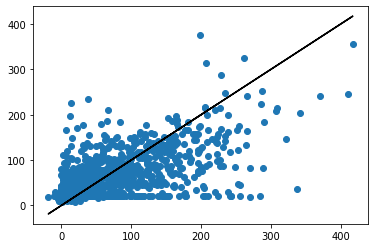

MSE: 2236.1
R^2: 0.45


,qb_dropback-2,qb_dropback-1,rush_attempt-1,fanPts-1,qb_dropback-3,incomplete_pass-1,rush_attempt-3,pass_attempt-1,tackled_for_loss-1,fumble-1,incomplete_pass-2,fumble-2,yards_gained-1,shotgun-3,incomplete_pass-3,fanPts-2,qb_hit-2,no_huddle-1,tackled_for_loss-2,rush_yards-1,qb_hit-1,complete_pass-2,complete_pass-3,tackled_for_loss-3,fumble-3,rush_attempt-2,pass_attempt-2,no_huddle-3,rec_yards-2,pass_touchdown-3,yards_gained-2,yards_gained-3,shotgun-1,pass_attempt-3,interception-1,rush_touchdown-3,yards_after_catch-1,touchdown-2,touchdown-3,rush_yards-3,fanPts-3,yards_after_catch-2,interception-2,rec_yards-1,yards_after_catch-3,pass_touchdown-1,rec_yards-3,air_yards-3,rush_touchdown-1,rush_yards-2,rush_touchdown-2,complete_pass-1,touchdown-1,no_huddle-2,air_yards-2,air_yards-1,shotgun-2,pass_touchdown-2,interception-3,qb_hit-3
1,-0.238,-0.216,-0.200,0.177,-0.170,0.126,-0.113,0.105,0.082,-0.074,-0.071,-0.068,0.057,-0.054,0.054,0.053,-0.052,-0.052,0.048,0.048,-0.044,0.044,-0.043,0.039,-0.035,-0.029,-0.028,0.024,0.021,0.021,0.019,0.018,0.018,0.018,-0.017,-0.016,-0.015,-0.014,-0.014,0.013,-0.010,0.010,0.009,0.009,0.007,0.007,0.006,-0.005,0.005,-0.004,0.004,0.004,0.004,-0.003,0.003,0.003,0.003,-0.001,0.001,0.001


In [39]:
grid = GridSearchCV(
    linear_model.BayesianRidge(),
    {
        'alpha_1':[10**x for x in range(-2,3)],
        'alpha_2':[10**x for x in range(-2,3)],
        'lambda_1':[10**x for x in range(-2,3)],
        'lambda_2':[10**x for x in range(-2,3)],
        'normalize':[True,False]
    },
    n_jobs = -1,
    cv = 3
)

grid.fit(X_train,y_train)

print("Best parameters set found on development set:")
print(grid.best_params_)
     
# pd.DataFrame(grid.cv_results_)[['param_alpha','param_normalize','mean_test_score','std_test_score','rank_test_score']]

m = linear_model.BayesianRidge(**grid.best_params_)
m.fit(X_train,y_train)
y_pred = m.predict(X_dev)

plt.scatter(y_dev, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train.columns,m.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

#### GridSearchCV, hand-selected features

Best parameters set found on development set:
{'alpha_1': 1, 'alpha_2': 0.01, 'lambda_1': 0.1, 'lambda_2': 100, 'normalize': False}


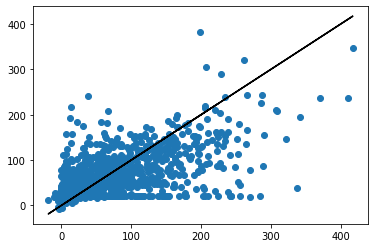

MSE: 2249.5
R^2: 0.45


,touchdown-2,touchdown-1,touchdown-3,fanPts-1,fanPts-2,fanPts-3,complete_pass-3,complete_pass-1,yards_gained-2,complete_pass-2,rush_attempt-3,rush_attempt-1,rush_attempt-2,yards_gained-3,yards_gained-1
1,-5.773,-5.063,-3.237,1.035,1.003,0.485,-0.305,-0.245,-0.076,-0.064,-0.062,-0.057,-0.026,-0.025,-0.008


In [41]:
grid = GridSearchCV(
    linear_model.BayesianRidge(),
    {
        'alpha_1':[10**x for x in range(-2,3)],
        'alpha_2':[10**x for x in range(-2,3)],
        'lambda_1':[10**x for x in range(-2,3)],
        'lambda_2':[10**x for x in range(-2,3)],
        'normalize':[True,False]
    },
    n_jobs = -1,
    cv = 3
)

grid.fit(X_train_select,y_train_select)

print("Best parameters set found on development set:")
print(grid.best_params_)
     
# pd.DataFrame(grid.cv_results_)[['param_alpha','param_normalize','mean_test_score','std_test_score','rank_test_score']]

m = linear_model.BayesianRidge(**grid.best_params_)
m.fit(X_train_select,y_train_select)
y_pred = m.predict(X_dev_select)

plt.scatter(y_dev_select, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train_select.columns,m.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

Best parameters set found on development set:
{'alpha': 10, 'l1_ratio': 0.25, 'normalize': False, 'positive': True}


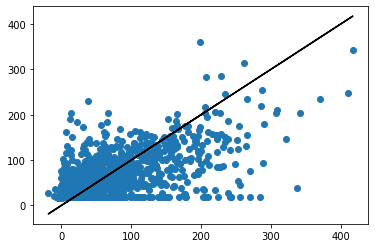

MSE: 2255.1
R^2: 0.44


,fanPts-1,fanPts-2,yards_gained-1,yards_gained-2,complete_pass-2,yards_gained-3,touchdown-3,rush_attempt-3,complete_pass-3,fanPts-3,touchdown-2,rush_attempt-2,touchdown-1,rush_attempt-1,complete_pass-1
1,0.217,0.067,0.053,0.007,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [30]:
grid = GridSearchCV(
    linear_model.BayesianRidge(),
    {
        'alpha_1':[10**x for x in range(-4,10)],
        'alpha_2':[10**x for x in range(-4,10)],
        'lambda_1':[10**x for x in range(-4,10)],
        'lambda_2':[10**x for x in range(-4,10)],
        'normalize':[True,False],
        'positive':[True]
    },
    n_jobs = -1,
    cv = 5
)

grid.fit(X_train_select,y_train_select)

print("Best parameters set found on development set:")
print(grid.best_params_)
     
# pd.DataFrame(grid.cv_results_)[['param_alpha','param_normalize','mean_test_score','std_test_score','rank_test_score']]

clf = linear_model.BayesianRidge(**grid.best_params_)
clf.fit(X_train_select,y_train_select)
y_pred = clf.predict(X_dev_select)

plt.scatter(y_dev_select, y_pred)
plt.plot(y_dev,y_dev,color='black')
plt.show()

print(f'MSE: {mean_squared_error(y_dev, y_pred).round(1)}')
print(f'R^2: {r2_score(y_dev, y_pred).round(2)}')

coefs = pd.DataFrame([X_train_select.columns,clf.coef_]).transpose()
coefs = coefs.reindex(coefs[1].abs().sort_values(ascending=False).index).set_index(0).transpose()
coefs

#### GridSearchCV, hand-selected features, force positive coefficients